In [33]:
import os
import json
import cv2
import albumentations as A
import numpy as np
from pycocotools.coco import COCO
import random

mid = 318
e = 8
range1 = mid*10000
range2 = mid*20000
# 加载COCO标注文件
coco_path = fr'C:\data\program\python\CowBoy\test\{mid}_json\train_{mid}.json'
image_dir_path = fr'C:\data\program\python\CowBoy\test\{mid}'
# 加载COCO标注文件
coco = COCO(coco_path)  # COCO标注文件路径
image_dir = image_dir_path  # 图像所在目录

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [34]:
# 获取所有图像的ID
image_ids = coco.getImgIds()
image_infos = coco.loadImgs(image_ids)

# 获取该图像的标注信息
annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_ids))

# 获取所有类别信息
categories = coco.loadCats(coco.getCatIds())


In [35]:
image_path = []
for image_info in image_infos:
    # 获取图像路径
    image_path.append(os.path.join(image_dir, image_info['file_name']))

len(image_path)

346

In [36]:
bboxes= []
labels =[]
for i in range(len(image_path)):
    bbox=[]
    label =[]
    img_info= []
    for ann in annotations:
        if ann['image_id'] == image_infos[i]['id']:
            bbox.append(ann['bbox'])
            label.append(ann['category_id'])
    bboxes.append(bbox)
    labels.append(label)

len(bboxes),len(labels)

(346, 346)

In [37]:
# 检查并创建保存图像和JSON文件的目录
# 检查并创建保存图像和JSON文件的目录
output_image_dir = 'add/'
output_json_dir = 'add_json/'
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_json_dir, exist_ok=True)
all_augmented_image_info,all_augmented_annotations=[],[]
for x in range(len(image_path)):
    path = os.path.join(image_dir, image_path[x])
    image = cv2.imread(path)
    # 获取图像的高和宽
    height, width, _ = image.shape

    # 计算三分之二的宽度和高度
    # crop_width_low = (int(height * 1 / 2), int(height * 3 / 4))
    crop_width =  int(width * 3 / 4)
    crop_height = int(height * 3 / 4)

    # if bboxes[x][2] > crop_width or bboxes[x][3] > crop_height:
    #     crop_width = width
    #     crop_height = crop_height
        
    transform = A.Compose([
        A.RandomSizedBBoxSafeCrop(
            height=crop_height, 
            width=crop_width, 
            p=0.8
        ),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.2),  
        A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),
        A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.5),
        A.GaussNoise(var_limit=(10, 50), p=0.2),
        A.RandomBrightnessContrast(p=0.3),
    ], bbox_params=A.BboxParams(format='coco', min_area=500, min_visibility=0.1, label_fields=['category_id']))


    for i in range(e):    
        augmented = transform(image=image, bboxes=bboxes[x], category_id=labels[x])  # 将转换后的边界框传入
        augmented_bboxes = augmented['bboxes']
        augmented_image = augmented['image']

        # 保存增强后的图像
        file_name = f"add_{i}_{mid}_{image_infos[x]['file_name']}"
        augmented_image_path = os.path.join(output_image_dir, file_name)
        # print(augmented_image_path)
        cv2.imwrite(augmented_image_path, augmented_image)
        print(f"{file_name}已保存")
        # 更新图像信息（文件名变化）
        augmented_image_info = image_infos[x].copy()
        # 生成一个新的唯一的 image_id
        def generate_unique_image_id(existing_ids):
            while True:
                new_id = random.randint(range1, range2)
                  
                if new_id not in existing_ids:  # 确保新的 ID 不在现有 ID 列表中
                    existing_ids.append(new_id)  # 将新的 ID 加入列表
                    return new_id
        new_image_id = generate_unique_image_id(image_ids)         
        augmented_image_info['file_name'] = file_name
        augmented_image_info['width'] = augmented_image.shape[1]
        augmented_image_info['height'] = augmented_image.shape[0]
        augmented_image_info['id'] = new_image_id   # 为每个增强图像分配唯一的id
        all_augmented_image_info.append(augmented_image_info)
        # 更新注解信息
        augmented_annotations = []

        for bbox, category in zip(augmented_bboxes, labels[x]):
            # 更新边界框信息，确保它们以新的格式存储            
            bbox = [round(coord, 2) for coord in bbox]
            # 生成一个新的唯一的 ann_id

            augmented_annotations.append({
                'id': ann['id'] , 
                'image_id': augmented_image_info['id'],
                "iscrowd": False,
                'bbox': bbox, 
                'category_id': category,
                'area': round(bbox[2] * bbox[3], 2)
            })
  
        all_augmented_annotations.extend(augmented_annotations)
        

add_0_318_a6c6f00ce96d1396.jpg已保存
add_1_318_a6c6f00ce96d1396.jpg已保存
add_2_318_a6c6f00ce96d1396.jpg已保存
add_3_318_a6c6f00ce96d1396.jpg已保存
add_4_318_a6c6f00ce96d1396.jpg已保存
add_5_318_a6c6f00ce96d1396.jpg已保存
add_6_318_a6c6f00ce96d1396.jpg已保存
add_7_318_a6c6f00ce96d1396.jpg已保存
add_0_318_ee1afae4fa684287.jpg已保存
add_1_318_ee1afae4fa684287.jpg已保存
add_2_318_ee1afae4fa684287.jpg已保存
add_3_318_ee1afae4fa684287.jpg已保存
add_4_318_ee1afae4fa684287.jpg已保存
add_5_318_ee1afae4fa684287.jpg已保存
add_6_318_ee1afae4fa684287.jpg已保存
add_7_318_ee1afae4fa684287.jpg已保存
add_0_318_a471fec99dc860e8.jpg已保存
add_1_318_a471fec99dc860e8.jpg已保存
add_2_318_a471fec99dc860e8.jpg已保存
add_3_318_a471fec99dc860e8.jpg已保存
add_4_318_a471fec99dc860e8.jpg已保存
add_5_318_a471fec99dc860e8.jpg已保存
add_6_318_a471fec99dc860e8.jpg已保存
add_7_318_a471fec99dc860e8.jpg已保存
add_0_318_8ce47c11bf4a8055.jpg已保存
add_1_318_8ce47c11bf4a8055.jpg已保存
add_2_318_8ce47c11bf4a8055.jpg已保存
add_3_318_8ce47c11bf4a8055.jpg已保存
add_4_318_8ce47c11bf4a8055.jpg已保存
add_5_318_8ce4

In [38]:
# 创建增强后的JSON数据
augmented_json_data = {
    'images': all_augmented_image_info,
    'annotations': all_augmented_annotations,
    'categories': categories
}
augmented_json_path = os.path.join(output_json_dir, f"{mid}.json")
with open(augmented_json_path, 'w') as json_file:
    json.dump(augmented_json_data, json_file, indent=4)

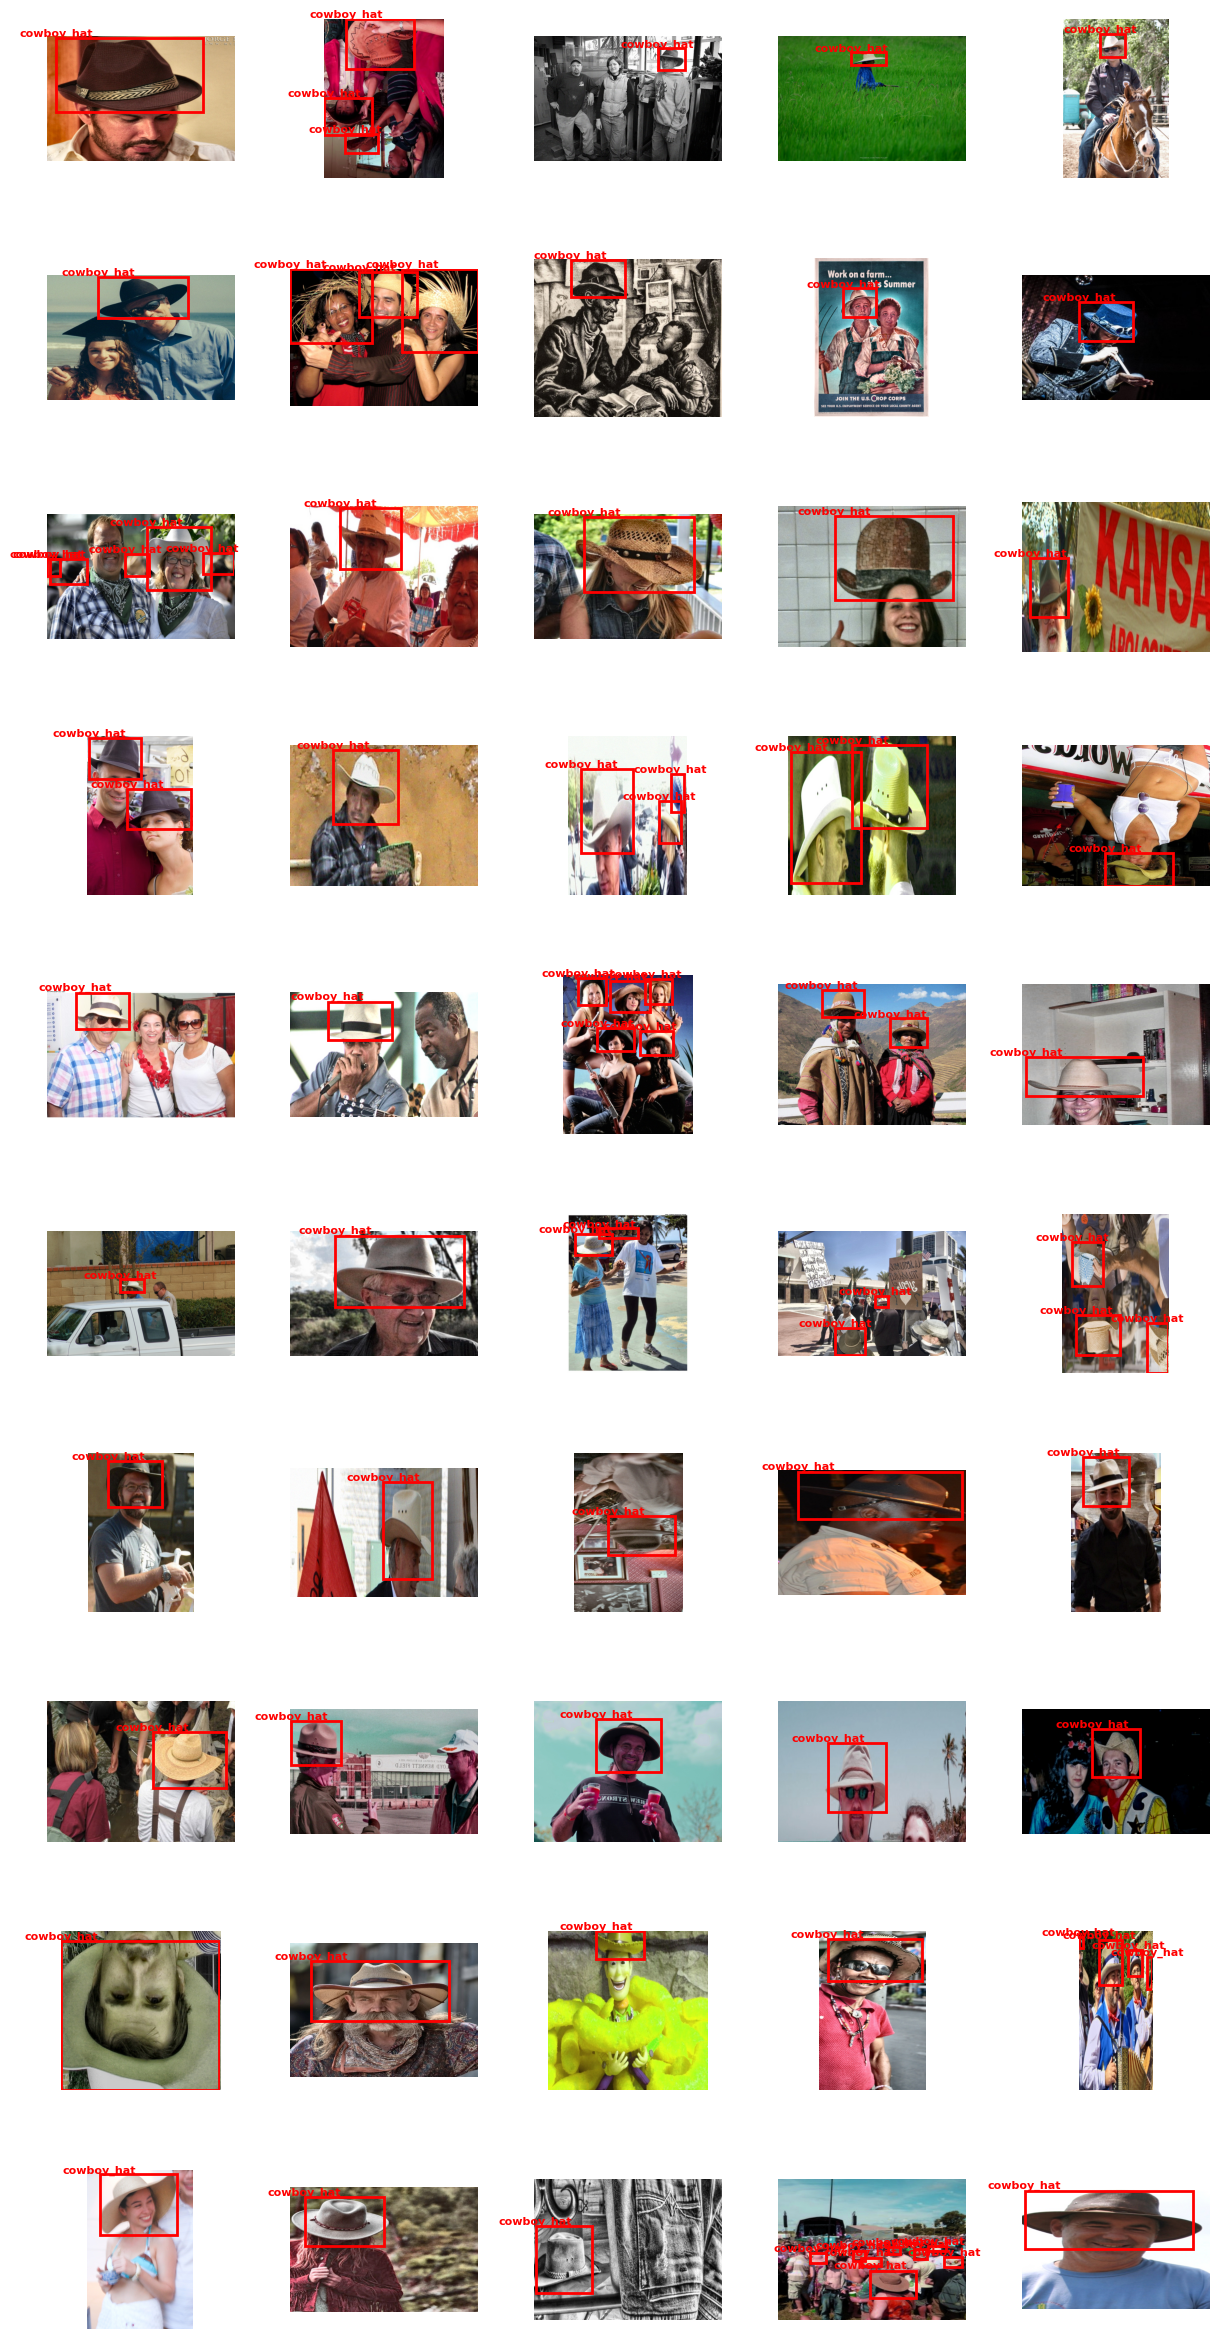

In [39]:
import os
import json
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import random

# 定义图像和JSON文件的路径
image_dir = output_image_dir  
json_path = fr'add_json/{mid}.json' 

# 读取合并后的JSON文件
with open(json_path, 'r') as f:
    data = json.load(f)

# 获取图像信息
images = data['images']
annotations = data['annotations']
categories = {category['id']: category['name'] for category in data['categories']}  # 类别字典

# 按图像ID分组标注
annotations_by_image = {}
for annotation in annotations:
    image_id = annotation.get('image_id')
    if image_id not in annotations_by_image:
        annotations_by_image[image_id] = []
    annotations_by_image[image_id].append(annotation)

# 随机抽取50张图像
random_images = random.sample(images, 50)

# 计算需要的行数和列数
rows = int(np.ceil(len(random_images) / 5))  # 向上取整计算行数
cols = 5  # 每行显示5张图片

# 调整图像显示大小，增大figsize
fig, ax = plt.subplots(rows, cols, figsize=(15, 3 * rows))

# 如果是单行或单列的情况，将ax转为一维数组
ax = ax.flatten()

for i, image_info in enumerate(random_images):
    image_id = image_info['id']
    image_path = os.path.join(image_dir, image_info['file_name'])

    # 读取图像
    image = cv2.imread(image_path)
    if image is None:
        print(f"无法读取图像: {image_path}")
        continue

    # 获取当前图像的标注框
    image_annotations = annotations_by_image.get(image_id, [])
    bboxes = [ann['bbox'] for ann in image_annotations]
    category_ids = [ann['category_id'] for ann in image_annotations]  # 获取类别ID

    # 绘制图像和边界框
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # 将BGR转为RGB显示
    
    # 绘制当前图像的所有边界框和标签
    for bbox, category_id in zip(bboxes, category_ids):
        x, y, w, h = bbox
        rect = Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax[i].add_patch(rect)
        
        # 绘制类别标签
        label = categories.get(category_id, 'Unknown')
        ax[i].text(x, y - 10, label, color='red', fontsize=8, weight='bold', ha='center')

    ax[i].axis('off')

# 隐藏多余的子图
for i in range(len(random_images), len(ax)):
    ax[i].axis('off')

# 调整子图间距，防止图像过于拥挤
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()
